In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

diamond=sns.load_dataset("diamonds")
print(diamond)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


/tmp/ipython-input-3250686487.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diamond, x="cut", y="price", estimator="mean", ci=None)


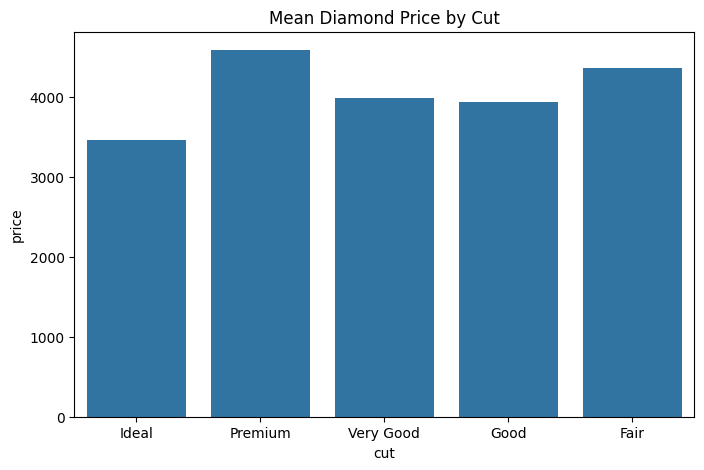

In [4]:
# 1. Bar graph - mean diamond price by cut
plt.figure(figsize=(8,5))
sns.barplot(data=diamond, x="cut", y="price", estimator="mean", ci=None)
plt.title("Mean Diamond Price by Cut")
plt.show()
# Observation: Premium and Ideal cuts tend to have higher mean prices than Fair and Good cuts.


/tmp/ipython-input-335657939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carat_by_clarity = diamond.groupby("clarity")["carat"].sum().reset_index()


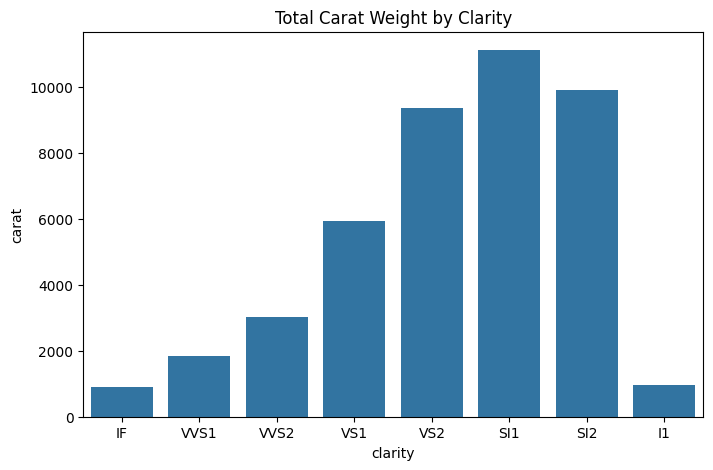

In [5]:
# 2. Total carat weight by clarity
carat_by_clarity = diamond.groupby("clarity")["carat"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=carat_by_clarity, x="clarity", y="carat")
plt.title("Total Carat Weight by Clarity")
plt.show()
# Observation: Some clarity grades like SI1 and VS2 dominate total carat contribution due to higher frequency.


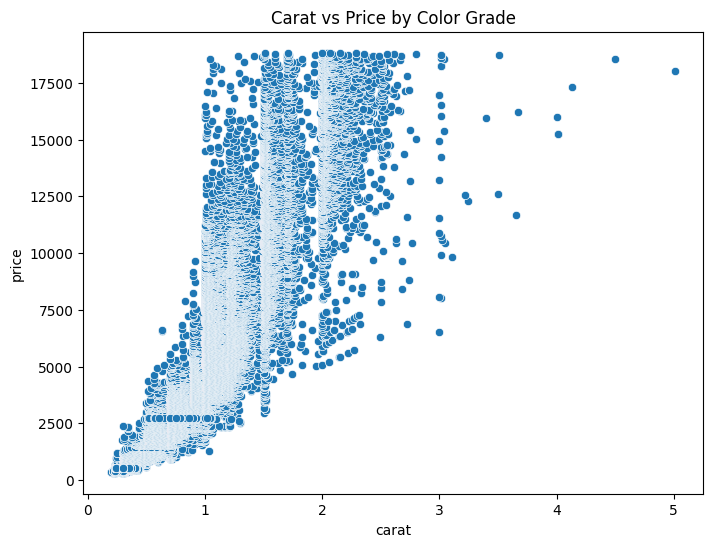

In [8]:
# 3. Scatterplot of carat vs price by color
plt.figure(figsize=(8,6))
sns.scatterplot(data=diamond, x="carat", y="price", hue="color")
plt.title("Carat vs Price by Color Grade")
plt.show()
# Observation: Price increases with carat, but dispersion differs across color grades (e.g., D-F are generally pricier).


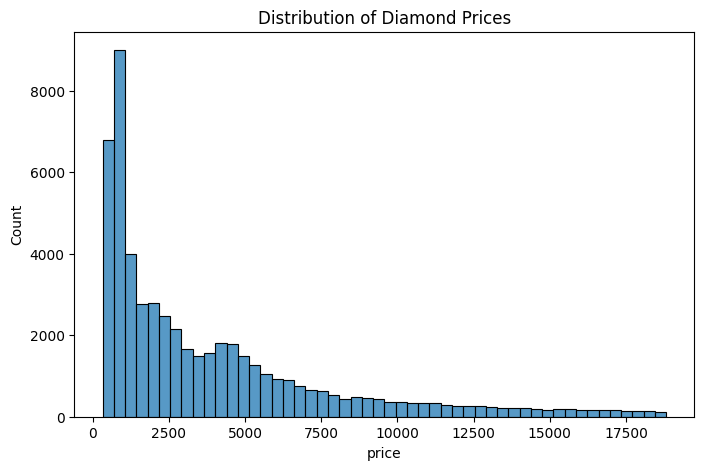

In [10]:

# 4. Histogram of price
plt.figure(figsize=(8,5))
sns.histplot(diamond["price"], bins=50, kde=False)
plt.title("Distribution of Diamond Prices")
plt.show()
# Observation: Most diamonds are priced below $5000, with fewer in the high-price tail.

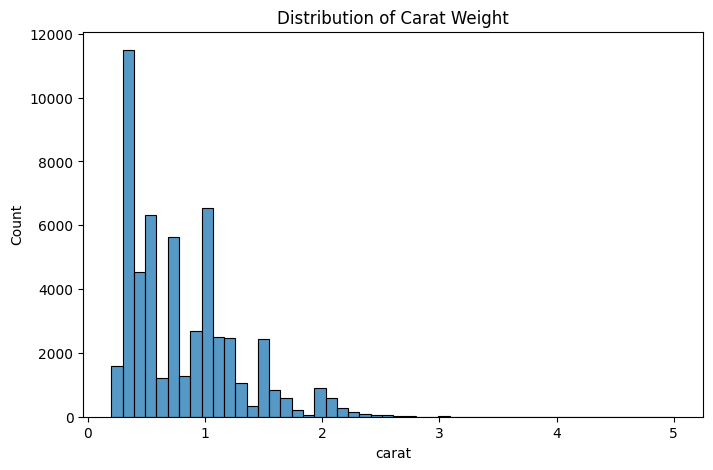

In [12]:
# 5. Histogram of carat distribution
plt.figure(figsize=(8,5))
sns.histplot(diamond["carat"], bins=50, kde=False)
plt.title("Distribution of Carat Weight")
plt.show()
# Observation: Majority of diamonds are below 2 carats, with a long right-skewed distribution.



/tmp/ipython-input-1761358800.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_price = diamond.pivot_table(values="price", index="cut", columns="color", aggfunc="mean")


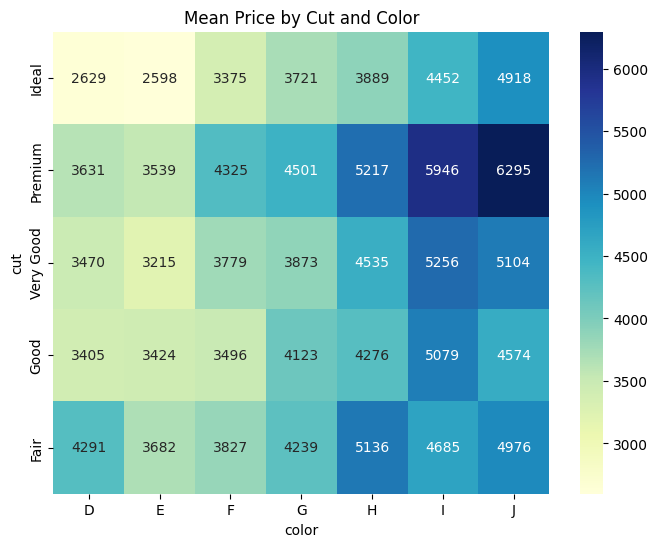

In [14]:
# 6. Heatmap - mean price by cut and color
pivot_price = diamond.pivot_table(values="price", index="cut", columns="color", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Mean Price by Cut and Color")
plt.show()
# Observation: Ideal cuts with color D–F fetch higher mean prices compared to Fair cuts.

/tmp/ipython-input-620706404.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_freq = diamond.pivot_table(values="price", index="cut", columns="clarity", aggfunc="count")


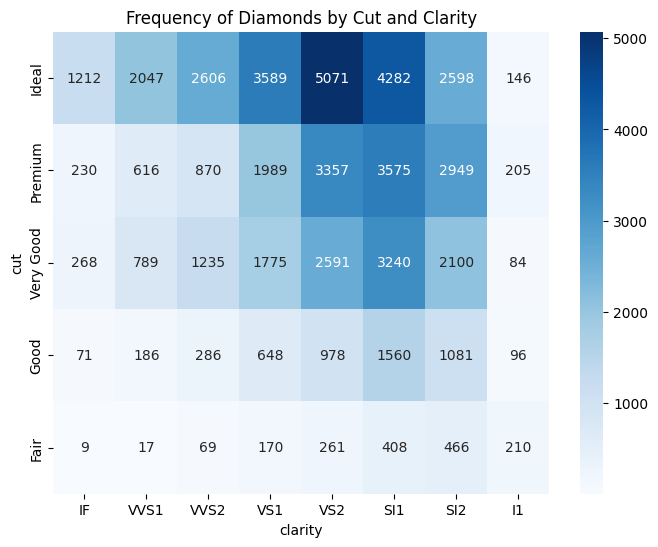

In [16]:
# 7. Heatmap - frequency of diamonds by cut and clarity
pivot_freq = diamond.pivot_table(values="price", index="cut", columns="clarity", aggfunc="count")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_freq, annot=True, fmt=".0f", cmap="Blues")
plt.title("Frequency of Diamonds by Cut and Clarity")
plt.show()
# Observation: Ideal cut with SI1 clarity is the most common combination.

/tmp/ipython-input-3709956600.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_depth = diamond.pivot_table(values="depth", index="cut", columns="clarity", aggfunc="mean")


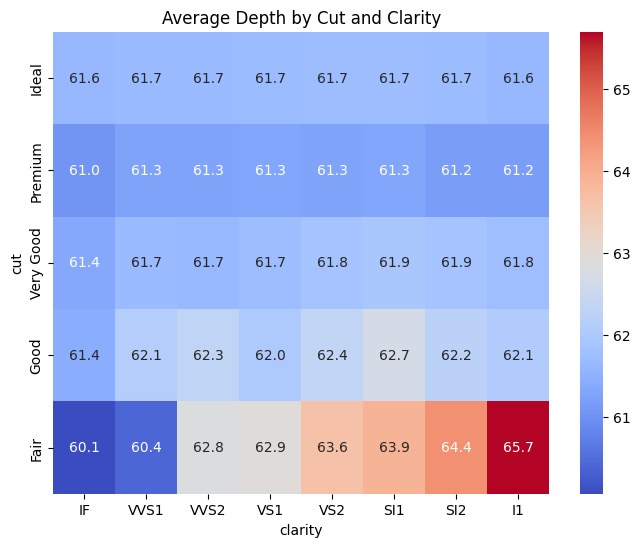

In [18]:

# 8. Heatmap - average depth by cut and clarity
pivot_depth = diamond.pivot_table(values="depth", index="cut", columns="clarity", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_depth, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Depth by Cut and Clarity")
plt.show()
# Observation: Depth varies slightly across cuts, with Fair cut showing slightly higher depth.



/tmp/ipython-input-3906096438.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_price_extremes = diamond.pivot_table(values="price", index="cut", columns="clarity", aggfunc="mean")


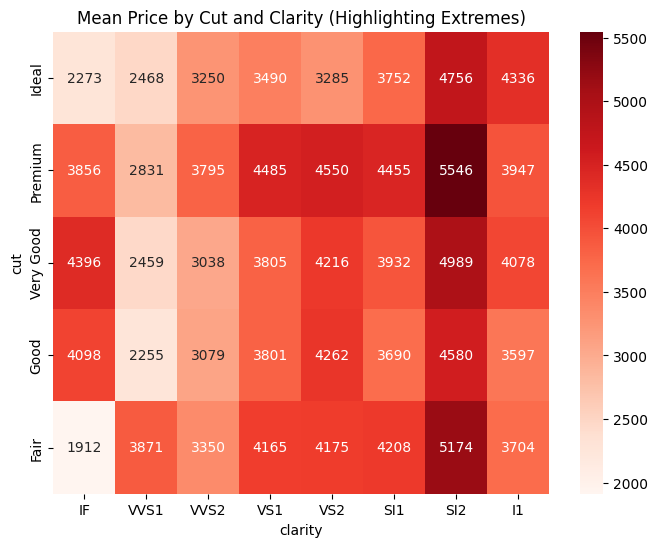

In [20]:
# 9. Heatmap - pricing extremes by cut and clarity
pivot_price_extremes = diamond.pivot_table(values="price", index="cut", columns="clarity", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_price_extremes, annot=True, fmt=".0f", cmap="Reds")
plt.title("Mean Price by Cut and Clarity (Highlighting Extremes)")
plt.show()
# Observation: High prices cluster around Ideal/Premium cuts with VS and VVS clarity.


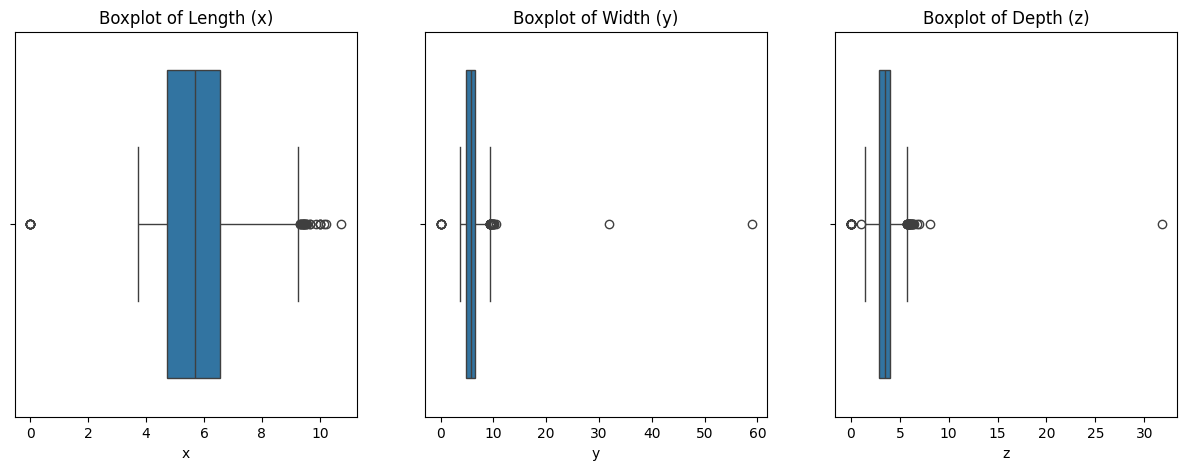

In [22]:

# 10. Box plots - detect outliers in dimensions (x=length, y=width, z=depth)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=diamond["x"])
plt.title("Boxplot of Length (x)")

plt.subplot(1,3,2)
sns.boxplot(x=diamond["y"])
plt.title("Boxplot of Width (y)")

plt.subplot(1,3,3)
sns.boxplot(x=diamond["z"])
plt.title("Boxplot of Depth (z)")

plt.show()
# Observation: Several extreme outliers exist in x, y, z dimensions, possibly due to data entry errors (e.g., zero or unusually large values).